In [1]:
# 69* 
# 59
# 57 high
# 55 high
# 54 high
# 52*
# 49*
# 47*
# 45 high
# 41 high
# 38*
# 36 high
# 32*
# 31*
# 28*
# 24*
# 22*
# 20*
# 18 high
# 15 high
# 8 high
# 2 high

In [21]:
from utils import *
from massfunction import *

import numpy as np
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import os
import emcee
import sys
import numpy as np
import pickle

In [22]:
cosmos_f = open('data/cosmo_params.pkl', 'rb')
cosmo_params = pickle.load(cosmos_f) #cosmo_params is a dict
cosmos_f.close()

In [32]:
X = []
Y = []
idx = {}
cidx = 0
weird_boxes = ['Box63_1400', 'Box35_1400', 'Box_n50_38_1400', 'Box5_1400']
for box in cosmo_params:
    if(box in weird_boxes):
        continue
    X += [box]
    idx[box] = cidx
    cidx+=1
    Y += [[cosmo_params[box][key] if 'nu' not in key else (cosmo_params[box][key])**(1/8) for key in cosmo_params[box]]]
    
X = np.array(X)
Y = np.array(Y)

# from sklearn.preprocessing import StandardScaler

# # Assuming Y is your input matrix with shape (n_samples, n_features)
# # Create an instance of StandardScaler
# scaler = Normalizer()

# # Fit the scaler to the data
# scaler.fit(Y)

# # Standardize the data
# Y = scaler.transform(Y)

In [33]:
import corner

{'As': 2.98381075, 'ns': 0.95491755, 'H0': 65.91229248, 'w0': -1.13662307, 'ombh2': 0.02165173, 'omch2': 0.09348464, 'nu_mass_ev': 0.9795460410566663, 'sigma': 0.85929726}
{'As': 1.21240706, 'ns': 0.96274346, 'H0': 73.53203583, 'w0': -0.49274257, 'ombh2': 0.02211313, 'omch2': 0.09377914, 'nu_mass_ev': 0.9884504534619838, 'sigma': 0.36944377}
{'As': 1.4889675, 'ns': 0.93773395, 'H0': 74.20115662, 'w0': -0.67723805, 'ombh2': 0.02388596, 'omch2': 0.09176311, 'nu_mass_ev': 0.9926510728421104, 'sigma': 0.45824919}
{'As': 1.22418253, 'ns': 0.97371775, 'H0': 74.77924347, 'w0': -0.47965953, 'ombh2': 0.01930247, 'omch2': 0.10596491, 'nu_mass_ev': 0.993363701464858, 'sigma': 0.398144}


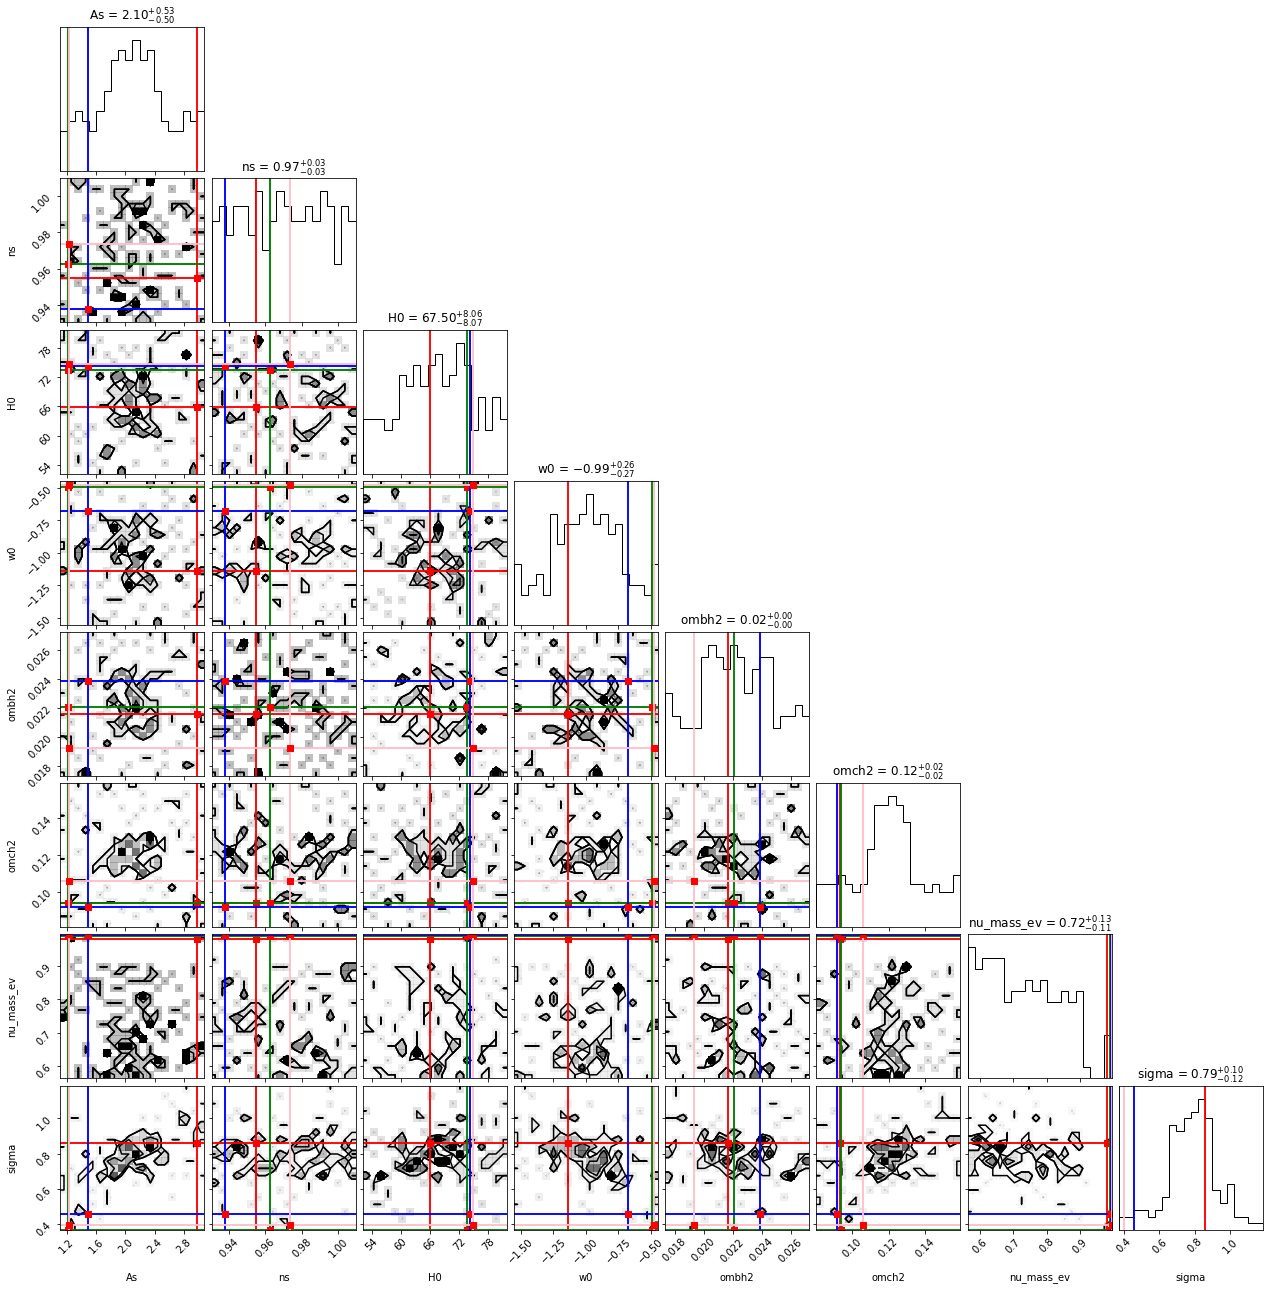

In [34]:
labels = list(cosmo_params[box].keys())
figure = corner.corner(Y,
                      labels=labels,
    show_titles=True,
    title_kwargs={"fontsize": 12},
)

ndim = len(labels)
# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))
lst_box = ['Box38_1400', 'Box47_1400','Box49_1400','Box52_1400']
colors = ['red', 'green','blue', 'pink']

cdict = dict(zip(lst_box, colors))
for tmp_box in lst_box:
    curr_cosmo = cosmo_params[tmp_box]
    curr_cosmo['nu_mass_ev'] = (curr_cosmo['nu_mass_ev'])**(1/8)

    X_box = list(curr_cosmo.values())
    print(cosmo_params[tmp_box])
#     X_box = scaler.transform(X_box)
    value1 = X_box
    value2 = X_box

    # Loop over the diagonal
    for i in range(ndim):
        ax = axes[i, i]
        ax.axvline(value1[i], color=cdict[tmp_box])
        ax.axvline(value2[i], color=cdict[tmp_box])

    # Loop over the histograms
    for yi in range(ndim):
        for xi in range(yi):
            ax = axes[yi, xi]
            ax.axvline(value1[xi], color=cdict[tmp_box])
            ax.axvline(value2[xi], color=cdict[tmp_box])
            ax.axhline(value1[yi], color=cdict[tmp_box])
            ax.axhline(value2[yi], color=cdict[tmp_box])
            ax.plot(value1[xi], value1[yi], "sg")
            ax.plot(value2[xi], value2[yi], "sr")